# Introduction to Python for Data Science Final Project 2: Logistic Regression

## Introduction

### Team Member:
1. Qaris Ardian Pratama

### Abstract

Australia merupakan negara yang sangat besar. Keadaan ini memungkinkan Australia untuk memiliki iklim yang berbeda antar wilayah negara tersebut. Sebagian besar wilayah di Australia memiliki empat musim. Akan tetapi, di wilayah Top End (termasuk Darwin, Katherine, Kakadu, dam Arnhem Land), Broome, Kimberley, dan Tropical North Queensland (Cairns, Whitsundays, dan Daintree Rainforest) memiliki dua musim saja, yaitu musim hujan (November - April) dan musim kering (Mei - Oktober).

Sebelum parahnya perubahan iklim, periode daripada musim itu sangat signifikan. Akan tetapi, semakin parahnya perubahan iklim membuat periode musim yang sudah dikenal tidak lagi signifikan karena musim hujan bisa saja terjadi di bulan Juni yang seharusnya masuk ke periode musim kering di beberapa wilayah Australia. Oleh karena itu, dibuatlah model prediksi dengan perbandingan metodel **Logistic Regression**, **Decision Tree**, dan **Random Forest** untuk membantu masyarakat Australia mengantisipasi hujan.

Dataset yang digunakan diambil dari Kaggle yang berjudul **Rain in Australia**. Isi dari dataset tersebut adalah record data hujan harian selama 10 tahun di Australia. Target variabel yang harus diprediksi adalah feature RainTomorrow, yaitu "Yes" maka besok harinya terjadi hujan 1mm atau lebih.

### Objective
Objective yang ingin dicapai dalam analisis ini adalah sebagai berikut.

* Mengetahui faktor-faktor yang berpengaruh signifikan dalam memprediksi hujan di Australia
* Menemukan model terbaik untuk digunakan dalam memprediksi hujan di Australia
* Memberikan insight yang dapat membantu pihak penduduk dalam bentuk charts

## Import Library

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pickle
import warnings
import datetime
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
%matplotlib inline

## Data Loading

In [62]:
df = pd.read_csv('../../../../data_set/weatherAUS.csv')
pd.set_option('display.max_columns', None)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [63]:
df.shape

(145460, 23)

**Keterangan**
<br>
Terdapat **145460** baris data dan **23** kolom

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Keterangan**
<br>
Feature Date bisa diubah dari tipe data object ke datetime untuk melihat apakah ada data yang kosong atau tidak sesuai. Dari keterangan Non-Null Count juga terlihat ada cukup banyak missing value pada dataset

In [65]:
df['Date'] = pd.to_datetime(df['Date'])

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

### View Statistical Data

In [67]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## Data Cleaning

### Handling Missing Value

In [68]:
missing_value = pd.DataFrame({"Missing_Value":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
missing_value

,Missing_Value,Percent
Date,0,0.0 %
Location,0,0.0 %
MinTemp,1485,1.02 %
MaxTemp,1261,0.87 %
Rainfall,3261,2.24 %
Evaporation,62790,43.17 %
Sunshine,69835,48.01 %
WindGustDir,10326,7.1 %
WindGustSpeed,10263,7.06 %
WindDir9am,10566,7.26 %


In [69]:
# mencari categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('Terdapat {} categorical variables\n'.format(len(categorical)))

print('Yang termasuk categorical variables adalah :', categorical)

Terdapat 6 categorical variables

Yang termasuk categorical variables adalah : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [70]:
df[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [71]:
# mencari numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('Terdapat {} numerical variables\n'.format(len(numerical)))

print('Yang merupakan numerical variables adalah :', numerical)

Terdapat 17 numerical variables

Yang merupakan numerical variables adalah : ['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [72]:
#Display nemerical variables
df[numerical].head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2008-12-01,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,2008-12-02,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,2008-12-03,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,2008-12-04,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,2008-12-05,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


**Keterangan**
<br>
Secara umum terdapat categorical variabel dan numerical variabel yang harus di-handle dalam masalah missing value. Untuk tipe data categorical, missing value akan diisi dengan modus. Sedangkan, untuk tipe data numerical, missing value akan diisi dengan median.

In [73]:
df_clean = df.copy()
df_clean.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [74]:
# Mengisi missing value categorical dengan nilai modus
df_clean['WindGustDir'].fillna(df_clean['WindGustDir'].mode()[0], inplace=True)
df_clean['WindDir9am'].fillna(df_clean['WindDir9am'].mode()[0], inplace=True)
df_clean['WindDir3pm'].fillna(df_clean['WindDir3pm'].mode()[0], inplace=True)
df_clean['RainToday'].fillna(df_clean['RainToday'].mode()[0], inplace=True)
df_clean['RainTomorrow'].fillna(df_clean['RainTomorrow'].mode()[0], inplace=True)

In [75]:
missing_value = pd.DataFrame({"Missing_Value":df_clean.isna().sum(), "Percent":df_clean.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
missing_value

,Missing_Value,Percent
Date,0,0.0 %
Location,0,0.0 %
MinTemp,1485,1.02 %
MaxTemp,1261,0.87 %
Rainfall,3261,2.24 %
Evaporation,62790,43.17 %
Sunshine,69835,48.01 %
WindGustDir,0,0.0 %
WindGustSpeed,10263,7.06 %
WindDir9am,0,0.0 %


In [76]:
# Mengisi missing value numerical dengan nilai median
df_clean = df_clean.fillna(df_clean.median())

In [77]:
missing_value = pd.DataFrame({"Missing_Value":df_clean.isna().sum(), "Percent":df_clean.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
missing_value

,Missing_Value,Percent
Date,0,0.0 %
Location,0,0.0 %
MinTemp,0,0.0 %
MaxTemp,0,0.0 %
Rainfall,0,0.0 %
Evaporation,0,0.0 %
Sunshine,0,0.0 %
WindGustDir,0,0.0 %
WindGustSpeed,0,0.0 %
WindDir9am,0,0.0 %


**Keterangan**
<br>
Missing value sudah berhasil di-handle

### Parsing Date Feature

In [78]:
df_clean['Year'] = df_clean['Date'].dt.year
df_clean.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No,2008
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No,2008
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No,2008
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No,2008
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008


In [79]:
df_clean['Month'] = df_clean['Date'].dt.month
df_clean['Day'] = df_clean['Date'].dt.day
df_clean.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


**Keterangan**
<br>
Karena kolom Date sudah diuraikan menjadi kolom-kolomnya sendiri (Year, Month, dan Day), maka kolom Date bisa didrop

In [80]:
df_clean.drop('Date', axis=1, inplace = True)
df_clean.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [81]:
numerical.remove('Date')
numerical.append('RainTomorrow')
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainTomorrow']

## EDA and Visualization

### Location Analysis

In [82]:
print("Unique locations and their counts :")
location = df_clean["Location"].value_counts()
location = location.reset_index()
location.columns= ["Location", "Counts"]
print(location)

Unique locations and their counts :
            Location  Counts
0           Canberra    3436
1             Sydney    3344
2             Darwin    3193
3          Melbourne    3193
4           Brisbane    3193
5           Adelaide    3193
6              Perth    3193
7             Hobart    3193
8             Albany    3040
9       MountGambier    3040
10          Ballarat    3040
11        Townsville    3040
12         GoldCoast    3040
13            Cairns    3040
14        Launceston    3040
15      AliceSprings    3040
16           Bendigo    3040
17            Albury    3040
18       MountGinini    3040
19        Wollongong    3040
20         Newcastle    3039
21       Tuggeranong    3039
22           Penrith    3039
23           Woomera    3009
24         Nuriootpa    3009
25             Cobar    3009
26      CoffsHarbour    3009
27             Moree    3009
28              Sale    3009
29      PerthAirport    3009
30        PearceRAAF    3009
31       Witchcliffe    3009
32     

In [83]:
# Creating Treemap plot
fig = px.treemap(location, path=['Location'], values='Counts', color='Counts', title="Tingkat Curah Hujan Berdasarkan Wilayah Di Australia")

# Displaying Treemap plot
fig.show()

**Keterangan**
<br>
Berdasarkan graph di atas, terdapat 3 bagian yang terlihat berbeda secara signifikan, bagian kuning, orange, dan biru dengan warna orange yang paling mendominasi. Canberra merupakan wilayah dengan tingkat hujan paling tinggi dan Katherine, Nhil, serta Uluru merupakan daerah dengan tingkat hujan rendah.

### RainTomorrow Analysis

In [84]:
df_clean['RainTomorrow'].value_counts()

No     113583
Yes     31877
Name: RainTomorrow, dtype: int64

Text(0.5, 28.597222222222207, 'Hari besok Hujan')

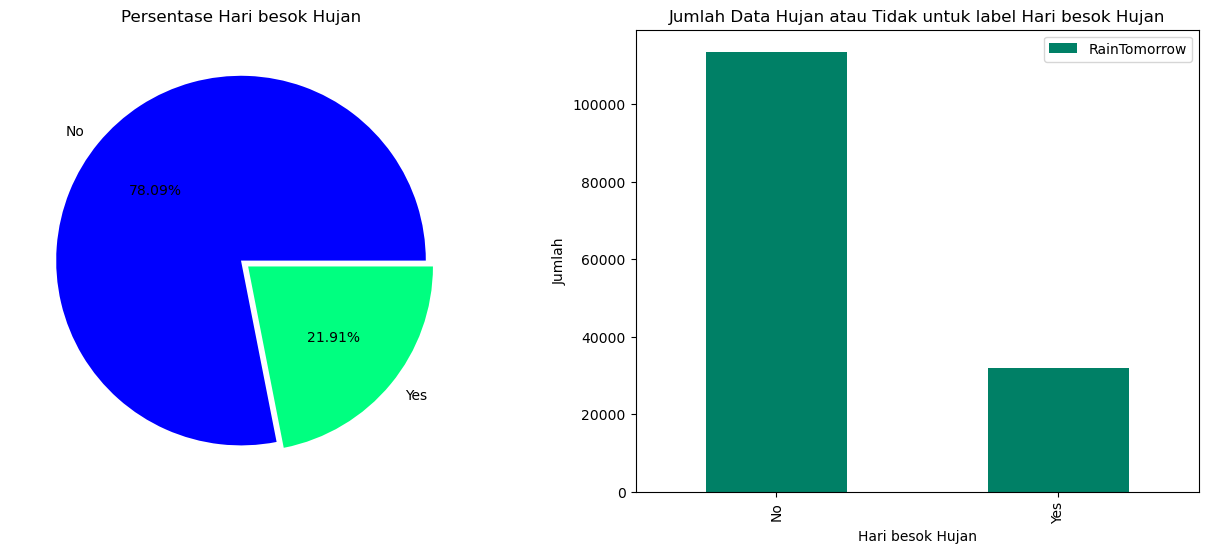

In [85]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

# persentase "Hari besok Hujan"
df_clean['RainTomorrow'].value_counts().plot(
    kind='pie',
    autopct='%.2f%%',
    explode=[0,0.05], 
    cmap='winter',
    shadow=False,
    ax=ax[0]
)
ax[0].set_title('Persentase Hari besok Hujan')
ax[0].set_ylabel('')

# Barchart besaran setiap nilai pada kelas target
df_clean.groupby('RainTomorrow').agg({'RainTomorrow':'count'}).plot(
    kind='bar',
    ax=ax[1],
    cmap='summer'
)

# Save Plot
plt.savefig("rainfall_tomorrow.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

ax[1].set_title('Jumlah Data Hujan atau Tidak untuk label Hari besok Hujan')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Hari besok Hujan')

**Keterangan**
<br>
Terdapat dua data pada variabel target, yaitu Yes atau No. Terdapat 113583 (78.09%) data No dan 31877 (21.91%) data Yes

### Year Analysis

In [86]:
year = df_clean['Year']
year_rain_value = {
    "year": year,
    "rain_tommorow": df['RainTomorrow']
}
year_rain_ds = pd.DataFrame(year_rain_value)
rain_yes = year_rain_ds[year_rain_ds['rain_tommorow'] == 'Yes']
rain_no = year_rain_ds[year_rain_ds['rain_tommorow'] == 'No']

fig = go.Figure()

fig.add_trace(go.Bar(x=rain_yes['year'].value_counts().keys(), 
                    y=rain_yes['year'].value_counts(), marker=dict(color='#2D3047'),
                    name='Yes', text=rain_yes['year'].value_counts()))
fig.add_trace(go.Bar(x=rain_no['year'].value_counts().keys(), marker=dict(color='#E84855'),
                    y=rain_no['year'].value_counts(), 
                    name='No'))
fig.update_layout(title="Year vs Rain Tomorrow",  template = "plotly_dark",xaxis=dict(
    title='Year'
), yaxis=dict(
    title='Frequency'
))

### Month Analysis

In [87]:
month = df_clean['Month']
year_rain_ds['month'] = month
month_rain_ds = year_rain_ds.drop('year', axis=1)
month_yes = month_rain_ds[month_rain_ds['rain_tommorow'] == 'Yes']
month_no = month_rain_ds[month_rain_ds['rain_tommorow'] == 'No']

fig = go.Figure()
fig.add_trace(go.Bar(x=month_yes['month'].value_counts().keys(), 
                     y=month_yes['month'].value_counts(), 
                     name='Yes', marker=dict(color='#2D3047')))
fig.add_trace(go.Bar(x=month_no['month'].value_counts().keys(), 
                     y=month_no['month'].value_counts(), 
                     name='No', marker=dict(color='#E84855')))
fig.update_layout(title="Month vs Rain Tomorrow", template = "plotly_dark", xaxis=dict(
    title="Month"
), yaxis=dict(
    title='Frequency'
))

### Day Analysis

In [88]:
day = df_clean['Day']
year_rain_ds['day'] = day
day_rain_ds = year_rain_ds.drop('year', axis=1)
day_yes = day_rain_ds[day_rain_ds['rain_tommorow'] == 'Yes']
day_no = day_rain_ds[day_rain_ds['rain_tommorow'] == 'No']

fig = go.Figure()
fig.add_trace(go.Bar(x=day_yes['day'].value_counts().keys(), 
                     y=day_yes['day'].value_counts(), 
                     name='Yes', marker=dict(color='#2D3047')))
fig.add_trace(go.Bar(x=day_no['day'].value_counts().keys(), 
                     y=day_no['day'].value_counts(), 
                     name='No', marker=dict(color='#E84855')))
fig.update_layout(title="Day vs Rain Tomorrow", template = "plotly_dark", xaxis=dict(
    title="Month"
), yaxis=dict(
    title='Frequency'
))

**Keterangan**
<br>
Dari graph di atas, diketahui bahwa dalam range 2007 - 2017, bulan Juni di tahun 2016 merupakan waktu dengan curah hujan tertinggi di Australia

In [89]:
num_data = df_clean[numerical]
num_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.192053,23.215962,2.307990,5.179779,7.989889,39.962189,14.030751,18.669758,68.901251,51.553396,1017.644768,1015.250115,4.659755,4.709913,16.987101,21.668916
std,6.365780,7.088358,8.389771,3.178819,2.757790,13.120931,8.861796,8.716716,18.855360,20.471345,6.728484,6.663994,2.281490,2.106768,6.449299,6.850658
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.600000,5.200000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


<AxesSubplot:xlabel='Humidity9am', ylabel='Humidity3pm'>

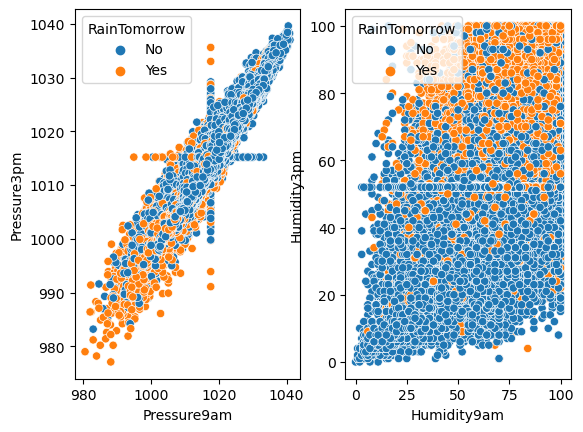

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.figsize = (10, 15)
sns.scatterplot(x='Pressure9am', y='Pressure3pm', data=num_data, hue='RainTomorrow', ax=axes[0])
sns.scatterplot(x='Humidity9am', y='Humidity3pm', data=num_data, hue='RainTomorrow', ax=axes[1])

**Keterangan**
<br>
Berdasarkan kedua graph di atas, terlihat bahwa hujan lebih mungkin di kondisi Presure rendah dan Humidity tinggi

### Categorical Analysis

In [91]:
categorical.append('Year')
categorical.append('Month')
categorical.append('Day')
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow',
 'Year',
 'Month',
 'Day']

In [92]:
df_categorical = df_clean[categorical]
df_categorical.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,W,W,WNW,No,No,2008,12,1
1,Albury,WNW,NNW,WSW,No,No,2008,12,2
2,Albury,WSW,W,WSW,No,No,2008,12,3
3,Albury,NE,SE,E,No,No,2008,12,4
4,Albury,W,ENE,NW,No,No,2008,12,5


#### Label Encode Data

In [93]:
label_encoder = LabelEncoder()

df_categorical['Location'] = label_encoder.fit_transform(df_categorical['Location'])
df_categorical['WindGustDir'] = label_encoder.fit_transform(df_categorical['WindGustDir'])
df_categorical['WindDir9am'] = label_encoder.fit_transform(df_categorical['WindDir9am'])
df_categorical['WindDir3pm'] = label_encoder.fit_transform(df_categorical['WindDir3pm'])
df_categorical['RainToday'] = label_encoder.fit_transform(df_categorical['RainToday'])
df_categorical['RainTomorrow'] = label_encoder.fit_transform(df_categorical['RainTomorrow'])
df_categorical['Year'] = label_encoder.fit_transform(df_categorical['Year'])
df_categorical['Month'] = label_encoder.fit_transform(df_categorical['Month'])
df_categorical['Day'] = label_encoder.fit_transform(df_categorical['Day'])

df_categorical.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13,13,14,0,0,1,11,0
1,2,14,6,15,0,0,1,11,1
2,2,15,13,15,0,0,1,11,2
3,2,4,9,0,0,0,1,11,3
4,2,13,1,7,0,0,1,11,4


#### Data Correlation

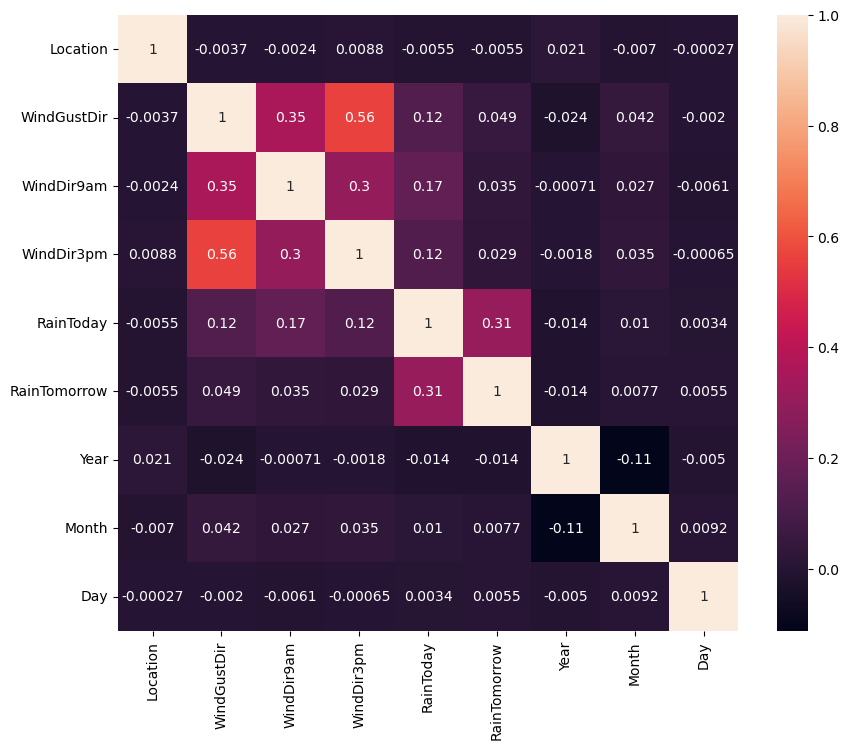

In [94]:
plt.figure(figsize=(10,8))

sns.heatmap(df_categorical.corr(), annot=True)

# Save Plot
plt.savefig("corr_categ.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

In [95]:
df_pred = df_clean.drop(columns=["WindDir9am","WindDir3pm"])

In [96]:
day = df_pred['Day']
year_rain_ds['day'] = day
day_rain_ds = year_rain_ds.drop('year', axis=1)
day_yes = day_rain_ds[day_rain_ds['rain_tommorow'] == 'Yes']
day_no = day_rain_ds[day_rain_ds['rain_tommorow'] == 'No']

fig = go.Figure()
fig.add_trace(go.Bar(x=day_yes['day'].value_counts().keys(), 
                     y=day_yes['day'].value_counts(), 
                     name='Yes', marker=dict(color='#2D3047')))
fig.add_trace(go.Bar(x=day_no['day'].value_counts().keys(), 
                     y=day_no['day'].value_counts(), 
                     name='No', marker=dict(color='#E84855')))
fig.update_layout(title="Correlation of Day and Rain Tomorrow", template = "plotly_dark", xaxis=dict(
    title="Day"
), yaxis=dict(
    title='Frequency'
))

### Numerical Analysis

**Keterangan**
Karena feature Date sudah diparsing, jadi perlu dihapus. Untuk melihat korelasinya, perlu juga ditambahkan variabel target, yaitu RainTomorrow

In [97]:
df_numerical = df_clean[numerical]
df_numerical.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


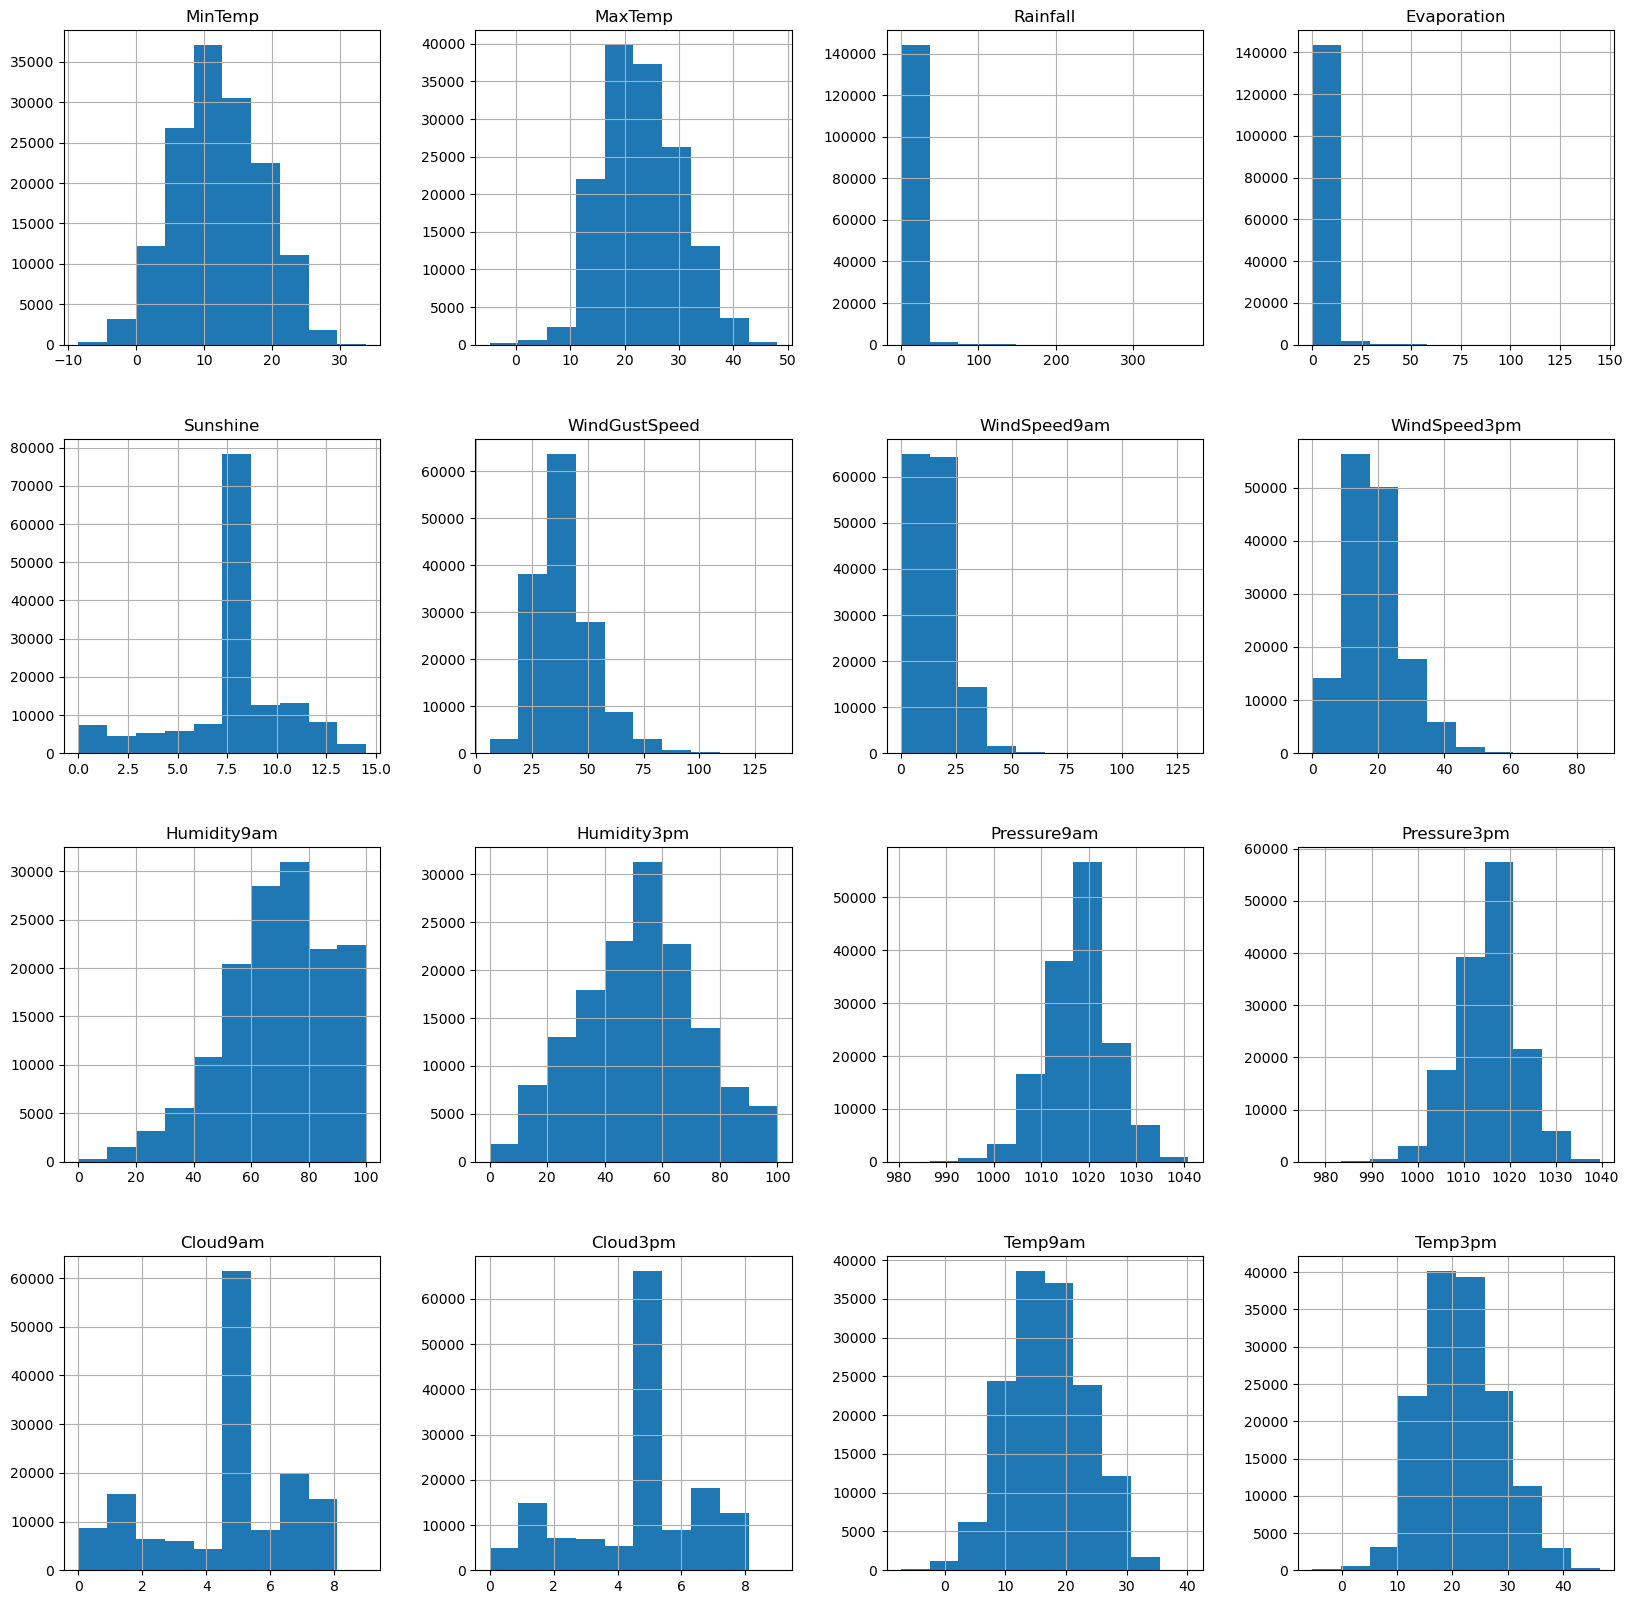

In [98]:
df_numerical.hist(bins=10, figsize = (20,20))

# Save Plot
plt.savefig("numer_col.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

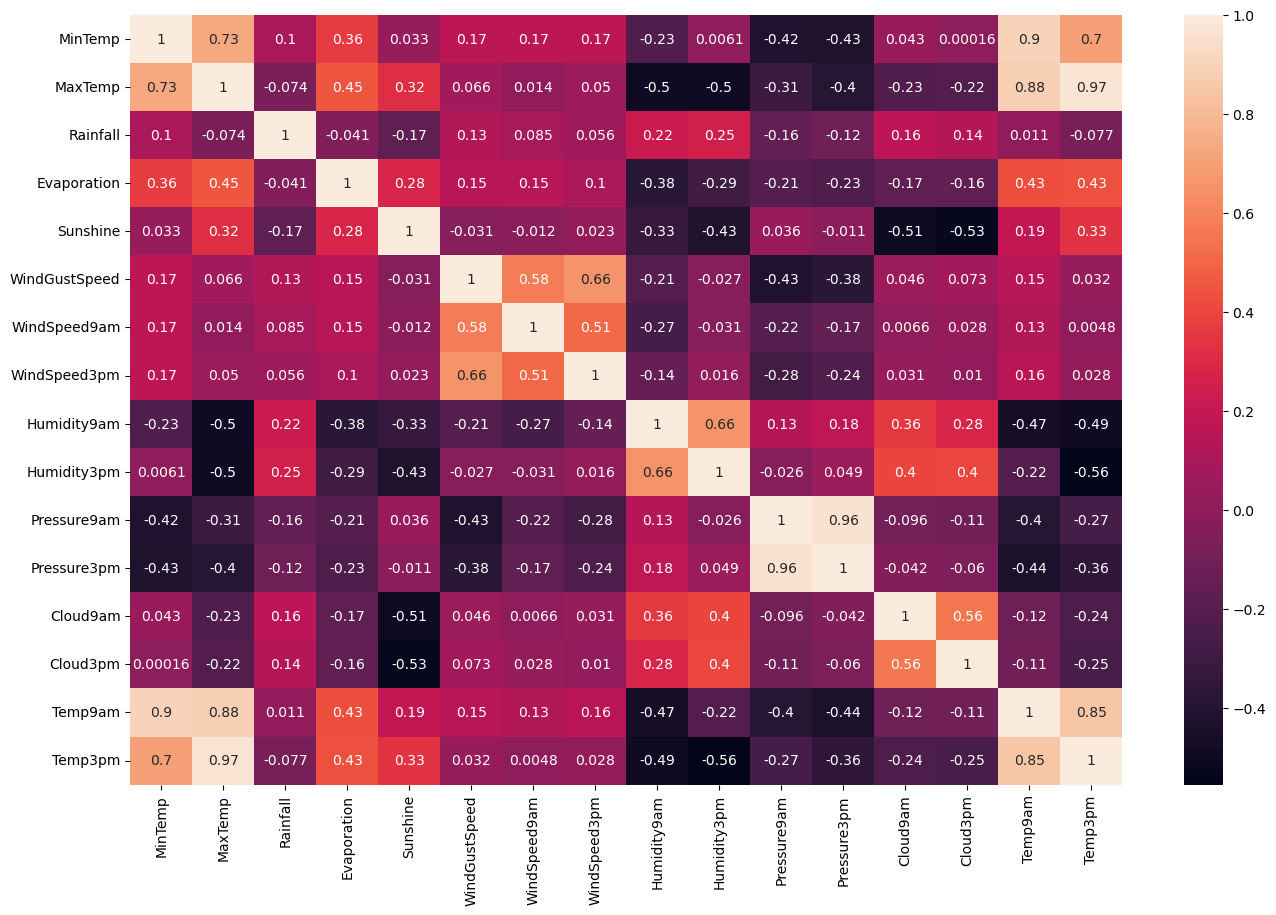

In [99]:
plt.figure(figsize=(16,10))

sns.heatmap(df_numerical.corr(), annot=True)
# Save Plot
plt.savefig("corr_heatmap_num.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')
plt.show()

#### Inspecting Outliers

In [100]:
df_numerical.describe().apply(round)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460.0,145460.0,145460.0,145460.0,145460.0,145460.0,145460.0,145460.0,145460.0,145460.0,145460.0,145460.0,145460.0,145460.0,145460.0,145460.0
mean,12.0,23.0,2.0,5.0,8.0,40.0,14.0,19.0,69.0,52.0,1018.0,1015.0,5.0,5.0,17.0,22.0
std,6.0,7.0,8.0,3.0,3.0,13.0,9.0,9.0,19.0,20.0,7.0,7.0,2.0,2.0,6.0,7.0
min,-8.0,-5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.0,977.0,0.0,0.0,-7.0,-5.0
25%,8.0,18.0,0.0,4.0,8.0,31.0,7.0,13.0,57.0,37.0,1014.0,1011.0,3.0,4.0,12.0,17.0
50%,12.0,23.0,0.0,5.0,8.0,39.0,13.0,19.0,70.0,52.0,1018.0,1015.0,5.0,5.0,17.0,21.0
75%,17.0,28.0,1.0,5.0,9.0,46.0,19.0,24.0,83.0,65.0,1022.0,1019.0,6.0,6.0,22.0,26.0
max,34.0,48.0,371.0,145.0,14.0,135.0,130.0,87.0,100.0,100.0,1041.0,1040.0,9.0,9.0,40.0,47.0


**Keterangan**
<br>
Berdasarkan tabel di atas, kemungkinan ada outliers di feature Rainfall, Evaporation, Windspeed9am, dan Windspeed3pm karena perbedaan antara nilai maksimum dan nilai lainnya terlalu jauh.

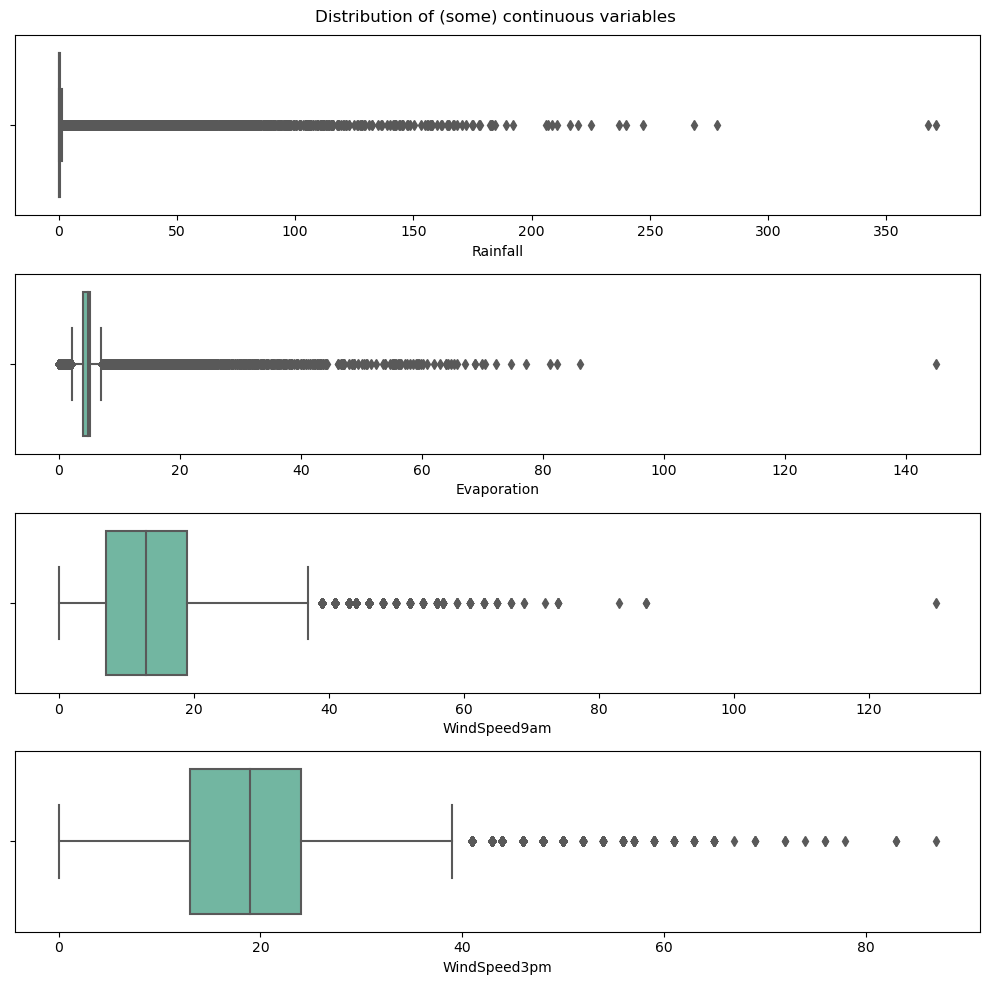

In [101]:
fig, axes = plt.subplots(4,1, figsize=(10, 10), sharey=False)
fig.suptitle('Distribution of (some) continuous variables')

# Rainfall
sns.boxplot(x= 'Rainfall', data = df_numerical, palette = 'Set2', ax = axes[0])
axes[0].set_title("")

# Evaporation
sns.boxplot(x= 'Evaporation', data = df_numerical, palette = 'Set2', ax = axes[1])
axes[1].set_title("")

# Windspeed (9AM)
sns.boxplot(x= 'WindSpeed9am', data = df_numerical, palette = 'Set2', ax = axes[2])
axes[2].set_title("")

# Windspeed (3PM)
sns.boxplot(x= 'WindSpeed3pm', data = df_numerical, palette = 'Set2', ax = axes[3])
axes[3].set_title("")

plt.tight_layout()

**Keterangan**
<br>
Terdapat banyak outliers di keempat feature tersebut. Perlu diketahui bagaimana distribusi dari keempat feature ini.

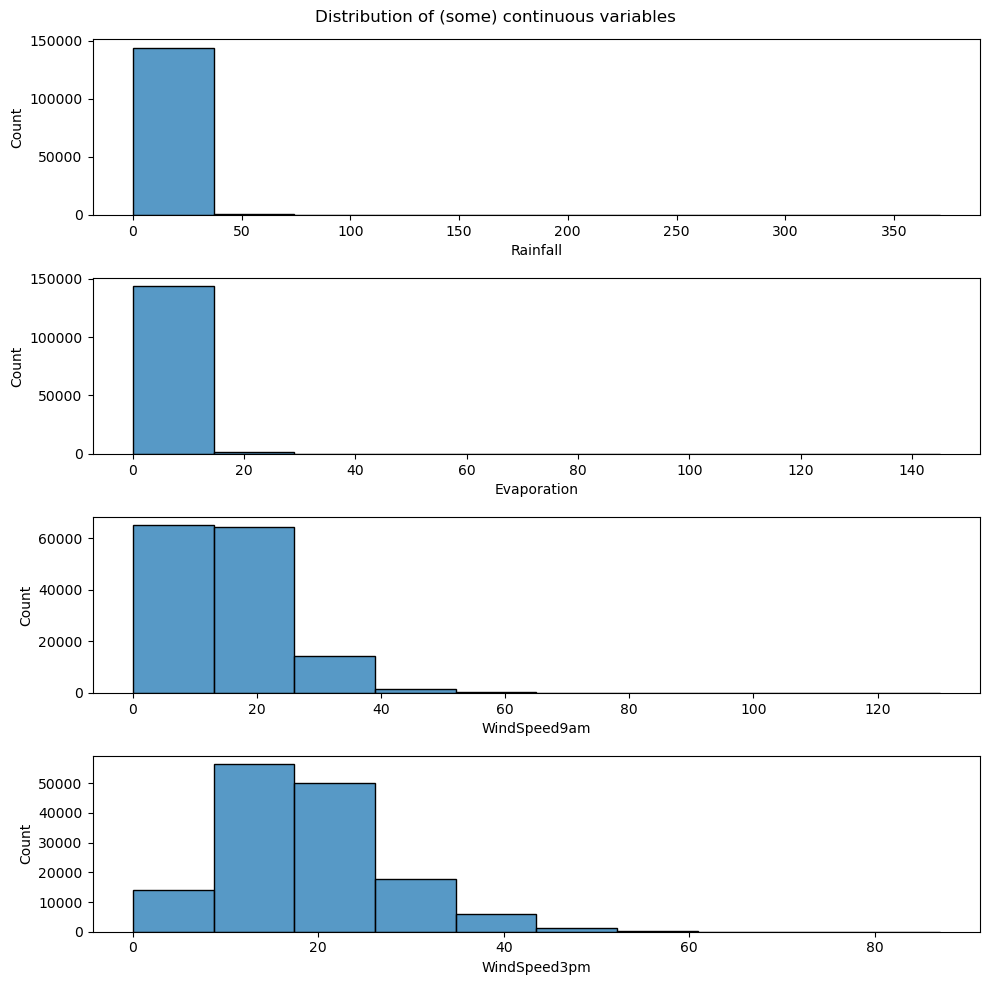

In [102]:
fig, axes = plt.subplots(4,1, figsize=(10, 10), sharey=False)
fig.suptitle('Distribution of (some) continuous variables')

# Rainfall
sns.histplot(x= 'Rainfall', data = df_numerical, palette = 'Set2', ax = axes[0], bins = 10)
axes[0].set_title("")

# Evaporation
sns.histplot(x= 'Evaporation', data = df_numerical, palette = 'Set2', ax = axes[1], bins = 10)
axes[1].set_title("")

# Windspeed (9AM)
sns.histplot(x= 'WindSpeed9am', data = df_numerical, palette = 'Set2', ax = axes[2], bins = 10)
axes[2].set_title("")

# Windspeed (3PM)
sns.histplot(x= 'WindSpeed3pm', data = df_numerical, palette = 'Set2', ax = axes[3], bins = 10)
axes[3].set_title("")

plt.tight_layout()

**Keterangan**
<br>
Berdasarkan kemiringan/skewness, perlu digunakan metode IQR Range untuk menanganinya

In [103]:
for column in ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']:
    IQR = df_numerical[column].quantile(0.75) - df_numerical[column].quantile(0.25)
    Lower_fence = df_numerical[column].quantile(0.25) - (IQR * 3)
    Upper_fence = df_numerical[column].quantile(0.75) + (IQR * 3)
    print(f'{column} outliers are values < {round(Lower_fence,2)} or > {round(Upper_fence,2)}')

Rainfall outliers are values < -1.8 or > 2.4
Evaporation outliers are values < 0.4 or > 8.8
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


In [104]:
q1, q3 = np.percentile(df_pred['Rainfall'], (25, 75))
iqr = q3 - q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
outliers_indecies = df_pred[df_pred['Rainfall'] > max].index.tolist()
df_pred = df_pred.drop(outliers_indecies, axis=0)

In [105]:
q1, q3 = np.percentile(df_pred['Evaporation'], (25, 75))
iqr = q3 - q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
outliers_indecies = df_pred[df_pred['Evaporation'] > max].index.tolist()
df_pred = df_pred.drop(outliers_indecies, axis=0)

In [106]:
q1, q3 = np.percentile(df_pred['WindSpeed9am'], (25, 75))
iqr = q3 - q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
outliers_indecies = df_pred[df_pred['WindSpeed9am'] > max].index.tolist()
df_pred = df_pred.drop(outliers_indecies, axis=0)

In [107]:
q1, q3 = np.percentile(df_pred['WindSpeed3pm'], (25, 75))
iqr = q3 - q1
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
outliers_indecies = df_pred[df_pred['WindSpeed3pm'] > max].index.tolist()
df_pred = df_pred.drop(outliers_indecies, axis=0)

In [108]:
df_pred.shape

(97093, 23)

In [109]:
df_clean.shape

(145460, 25)

## Data Preprocessing

### Numeric Data

#### Location

In [110]:
df_num_loc = pd.DataFrame(
    {
        "Location":df_pred["Location"].unique(),
        "location_num":df_categorical["Location"].unique()
    }
).sort_values(by="location_num", ascending=True)

df_num_loc = df_num_loc.set_index(keys="location_num",drop=True)
df_num_loc

,Location
location_num,
0,Adelaide
1,Albany
2,Albury
3,AliceSprings
4,BadgerysCreek
5,Ballarat
6,Bendigo
7,Brisbane
8,Cairns


#### WindGustDir

In [111]:
df_num_wind = pd.DataFrame(
    {
        "WindGustDir":df_pred["WindGustDir"].unique(),
        "wind_gust_dir_num":df_categorical["WindGustDir"].unique()
    }
).sort_values(by="wind_gust_dir_num", ascending=True)

df_num_wind = df_num_wind.set_index(keys="wind_gust_dir_num",drop=True)
df_num_wind

,WindGustDir
wind_gust_dir_num,
0,E
1,S
2,ESE
3,N
4,NE
5,ENE
6,NNW
7,SE
8,NW


#### Advance Data Preprocessing
Replace category feature with encode label

In [112]:
df_pred['Location']=df_categorical['Location']
df_pred['WindGustDir']=df_categorical['WindGustDir']
df_pred['RainToday']=df_categorical['RainToday']
df_pred['RainTomorrow']=df_categorical['RainTomorrow']
df_pred.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,4.8,8.4,13,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,4.8,8.4,14,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,4.8,8.4,15,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,4.8,8.4,4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,4.8,8.4,13,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


## Model Definition - Part 1

Metode yang digunakan adalah **Logistic Regression** dengan pembanding **Random Forest Classifier**, **Decision Tree Classifier**, **Naive Bayes**, dan **K-Nearest Neighbors**. Dengan **Logistic Regression** kita dapat mencari hubungan antara fitur (input) diskrit/kontinu dengan probabilitas hasil output diskrit tertentu.

**Decision Tree** membagi data menjadi himpunan bagian berdasarkan variabel inputnya. Algoritma ini merupakan jenis diagram alir yang membantu dalam proses pengambilan keputusan. Decision Tree ini menjadi alat pendukung keputusan yang menggunakan grafik atau model seperti pohon.

Sedangkan, **Random Forest** berfungsi karena menggabungkan prediksi dari beberapa algoritma ML untuk membuat prediksi yang lebih akurat daripada model individual. Ini menggunakan bias rendah dan varians tinggi untuk mengurangi kesalahan.

In [113]:
#Membuat variabel x untuk menampung semua kolom kecuali RainTomorrow
X = df_pred.drop(columns=['RainTomorrow'])

#Membuat variabel y untuk menampung kolom RainTomorrow
y = df_pred['RainTomorrow']

In [114]:
#Split x and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [115]:
#Standarisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.fit_transform(X_test)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

## Model Training

In [116]:
#Membuat model Logistic Regression
lreg_model = LogisticRegression(penalty = 'l2', random_state = 8)

In [117]:
#Membuat model Support Vector Machine
svm_model = svm.SVC(kernel='linear')

In [118]:
#Membuat model K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=16)

In [119]:
#Membuat model Random Forest Classifier
rfc_model = RandomForestClassifier(n_estimators=100)

In [120]:
#Membuat model Decision Tree Classifier
dtc_model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [121]:
#Membuat model Naive Bayes
gnb_model = GaussianNB()

## Evaluasi Model

### Logistic Regression
Part 1

In [122]:
#Model Training Logistic Regression
lreg_model = lreg_model.fit(X_train, y_train)

In [123]:
#Predict Probabilitas
lreg_model.predict_proba(X_train)

array([[0.17776562, 0.82223438],
       [0.9509063 , 0.0490937 ],
       [0.8120975 , 0.1879025 ],
       ...,
       [0.90643359, 0.09356641],
       [0.6843106 , 0.3156894 ],
       [0.9701532 , 0.0298468 ]])

In [124]:
#Score dari data training
lreg_model.score(X_train, y_train)

0.8659015669830059

In [125]:
#Predict data
y_pred_lreg = lreg_model.predict(X_test)
y_pred_lreg

array([0, 0, 0, ..., 1, 0, 0])

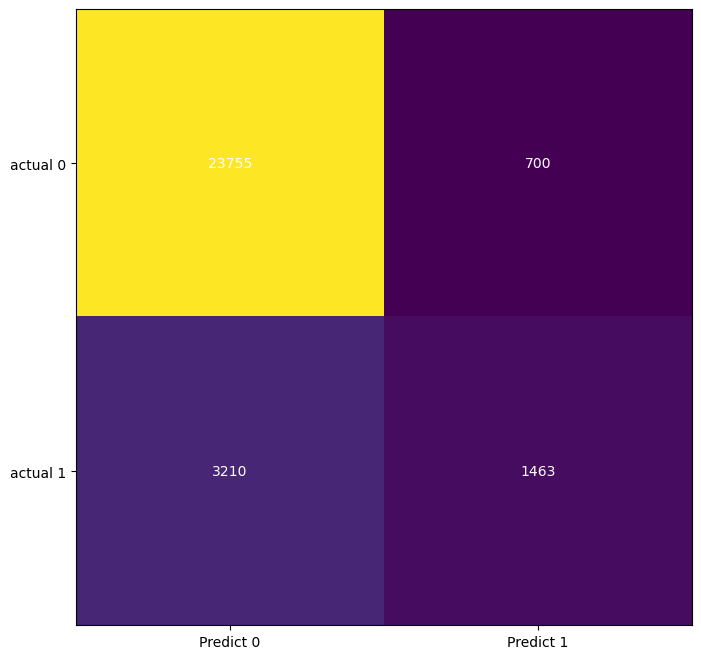

In [126]:
#Membuat visualisasi confusion matrix
cm = confusion_matrix(y_test,y_pred_lreg)
fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0','Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('actual 0', 'actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center',
               color='white')
        
# Save Plot
plt.savefig("confusion_matrix_1.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')
plt.show()

In [127]:
#Accuracy Score
lreg_model.score(X_test, y_test)

0.8657648997528151

In [128]:
#Classification Report Logistic Regression Part 1
print(classification_report(y_test,y_pred_lreg))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     24455
           1       0.68      0.31      0.43      4673

    accuracy                           0.87     29128
   macro avg       0.78      0.64      0.68     29128
weighted avg       0.85      0.87      0.84     29128



In [132]:
#Ringkasan Evaluasi Model Logistic Regression Part 1
print('Ringkasan Evaluasi Model Logistic Regression Part 1')
print("")
print('Akurasi :', round(accuracy_score(y_test, y_pred_lreg), 4))
print('Presisi :', round(precision_score(y_test,y_pred_lreg), 4))
print('Recall :', round(recall_score(y_test,y_pred_lreg), 4))
print('F1 Score :', round(f1_score(y_test,y_pred_lreg), 4))

Ringkasan Evaluasi Model Logistic Regression Part 1

Akurasi : 0.8658
Presisi : 0.6764
Recall : 0.3131
F1 Score : 0.428


### Find the Best Feature

In [134]:
#melihat feature importance
importance = lreg_model.coef_[0]
sorted_index = np.argsort(importance)
labels = X.columns[sorted_index]
df_importance = pd.DataFrame({'Feature Name': labels,
                          'Feature Importance' : importance[sorted_index]})
df_importance = df_importance.sort_values(by=['Feature Importance'], ascending=False)
df_importance

,Feature Name,Feature Importance
21,Humidity3pm,0.994107
20,Pressure9am,0.894964
19,WindGustSpeed,0.551486
18,Cloud3pm,0.316079
17,Temp3pm,0.161407
16,Rainfall,0.142916
15,Month,0.061393
14,Year,0.033402
13,WindGustDir,0.018498
12,Temp9am,0.012147


**Keterangan**
<br>
Feature yang tidak signifikan korelasinya dengan target variabel dapat didrop

In [135]:
df_pred2 = df_pred.drop(columns=[
    'MinTemp',
    'Cloud9am',
    'Humidity9am',
    'Evaporation',
    'RainToday',
    'WindSpeed9am',
    'MaxTemp',
    'WindSpeed3pm',
    'Sunshine',
    'Pressure3pm',
    'Location'
])
df_pred2.head()

,Rainfall,WindGustDir,WindGustSpeed,Humidity3pm,Pressure9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,Year,Month,Day
0,0.6,13,44.0,22.0,1007.7,5.0,16.9,21.8,0,2008,12,1
1,0.0,14,44.0,25.0,1010.6,5.0,17.2,24.3,0,2008,12,2
2,0.0,15,46.0,30.0,1007.6,2.0,21.0,23.2,0,2008,12,3
3,0.0,4,24.0,16.0,1017.6,5.0,18.1,26.5,0,2008,12,4
4,1.0,13,41.0,33.0,1010.8,8.0,17.8,29.7,0,2008,12,5


## Model Definition - Part 2

In [136]:
X_2 = df_pred2.drop(columns=['RainTomorrow'])
y_2 = df_pred2['RainTomorrow']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.3)

X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.fit_transform(X_test2)

lreg_model_2 = LogisticRegression(penalty = 'l2', random_state = 8)
lreg_model_2.fit(X_train2, y_train2)

LogisticRegression(random_state=8)

### Logistic Regression
Part 2

In [137]:
#Predict Probabilitas part 2
lreg_model_2.predict_proba(X_train2)

array([[0.86603409, 0.13396591],
       [0.77346417, 0.22653583],
       [0.88085004, 0.11914996],
       ...,
       [0.63977725, 0.36022275],
       [0.92517565, 0.07482435],
       [0.58569446, 0.41430554]])

In [138]:
#Score dari data training part 2
lreg_model_2.score(X_train2, y_train2)

0.8617523725446922

In [139]:
#Predict data part 2
y_pred_lreg_2 = lreg_model_2.predict(X_test2)
y_pred_lreg_2

array([0, 0, 0, ..., 0, 0, 0])

In [140]:
#Testing model part 2
lreg_model_2.score(X_test2,y_test2)

0.8615421587475968

In [141]:
#Classification Report Logistic Regression Part 2
print(classification_report(y_test2, y_pred_lreg_2))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     24434
           1       0.67      0.28      0.39      4694

    accuracy                           0.86     29128
   macro avg       0.77      0.62      0.66     29128
weighted avg       0.84      0.86      0.84     29128



In [142]:
#Ringkasan Evaluasi Model Logistic Regression Part 2
print('Ringkasan Evaluasi Model Logistic Regression Part 2')
print("")
print('Akurasi :', round(accuracy_score(y_test2, y_pred_lreg_2),4))
print('Presisi :', round(precision_score(y_test2,y_pred_lreg_2),4))
print('Recall :', round(recall_score(y_test2,y_pred_lreg_2),4))
print('F1 Score :', round(f1_score(y_test2,y_pred_lreg_2),4))

Ringkasan Evaluasi Model Logistic Regression Part 2

Akurasi : 0.8615
Presisi : 0.6717
Recall : 0.2755
F1 Score : 0.3907


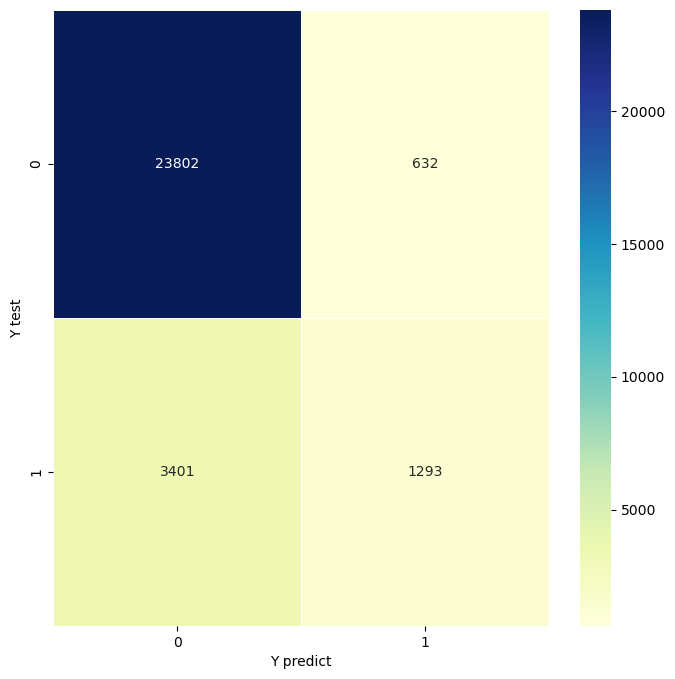

In [143]:
lg2 = confusion_matrix(y_test2, y_pred_lreg_2)
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(lg2, annot=True, linewidth=0.7, fmt='g', ax=ax, cmap="YlGnBu")
plt.xlabel('Y predict')
plt.ylabel('Y test')

# Save Plot
plt.savefig("confusion_matrix_2.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

### Support Vector Machine

In [144]:
#Model Training Support Vector Machine
svm_model = svm_model.fit(X_train2, y_train2)

In [145]:
#Predict data
y_pred_svm = svm_model.predict(X_test2)

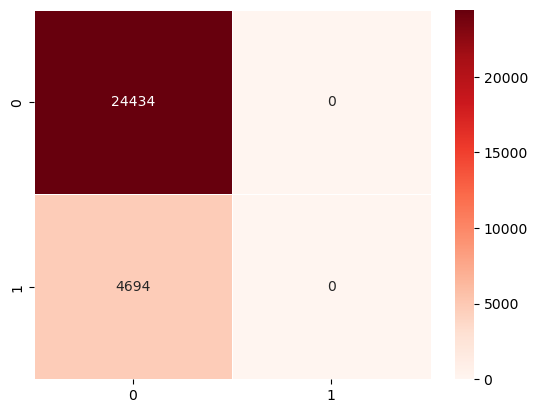

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     24434
           1       0.00      0.00      0.00      4694

    accuracy                           0.84     29128
   macro avg       0.42      0.50      0.46     29128
weighted avg       0.70      0.84      0.77     29128



In [146]:
cm_svm = confusion_matrix(y_test2, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

# Save Plot
plt.savefig("confusion_matrix_3.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()
print(classification_report(y_test2, y_pred_svm))

In [148]:
#Ringkasan Evaluasi Model Support Vector Machine
print('Ringkasan Evaluasi Model Support Vector Machine')
print("")
print('Akurasi :' ,round(accuracy_score(y_test2, y_pred_svm),4))
print('Presisi :' ,round(precision_score(y_test2,y_pred_svm),4))
print('Recall :' ,round(recall_score(y_test2,y_pred_svm),4))
print('F1 Score :' ,round(f1_score(y_test2,y_pred_svm),4))

Ringkasan Evaluasi Model Support Vector Machine

Akurasi : 0.8388
Presisi : 0.0
Recall : 0.0
F1 Score : 0.0


### K-Nearest Neighbors

In [149]:
# Train the model using the training sets
knn_model = knn_model.fit(X_train2, y_train2)

In [150]:
# Predict the response for test dataset
y_pred_knn = knn_model.predict(X_test2)

In [151]:
#Testing model
knn_model.score(X_test2, y_test2)

0.8618168085690744

In [152]:
#Classification Report K-Nearest Neighbors
print(classification_report(y_test2, y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     24434
           1       0.72      0.23      0.35      4694

    accuracy                           0.86     29128
   macro avg       0.80      0.61      0.64     29128
weighted avg       0.85      0.86      0.83     29128



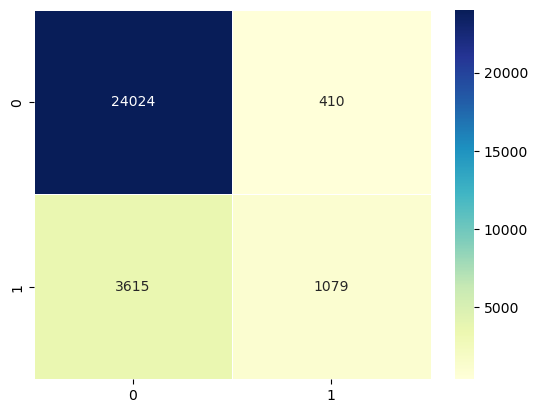

In [153]:
cm_knn = confusion_matrix(y_test2, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

# Save Plot
plt.savefig("confusion_matrix_4.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

In [154]:
#Ringkasan Evaluasi Model K-Nearest Neighbors
print('Ringkasan Evaluasi Model K-Nearest Neighbors')
print("")
print('Akurasi :' ,round(accuracy_score(y_test2, y_pred_knn),4))
print('Presisi :' ,round(precision_score(y_test2, y_pred_knn),4))
print('Recall :' ,round(recall_score(y_test2, y_pred_knn),4))
print('F1 Score :' ,round(f1_score(y_test2, y_pred_knn),4))

Ringkasan Evaluasi Model K-Nearest Neighbors

Akurasi : 0.8618
Presisi : 0.7246
Recall : 0.2299
F1 Score : 0.349


### Naive Bayes

In [155]:
# Train the model using the training sets
gnb_model = gnb_model.fit(X_train2, y_train2)

In [156]:
# Predict the response for test dataset
y_pred_gnb = gnb_model.predict(X_test2)

In [157]:
#Classification Report Naive Bayes
print(classification_report(y_test2, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     24434
           1       0.48      0.39      0.43      4694

    accuracy                           0.83     29128
   macro avg       0.68      0.65      0.67     29128
weighted avg       0.82      0.83      0.83     29128



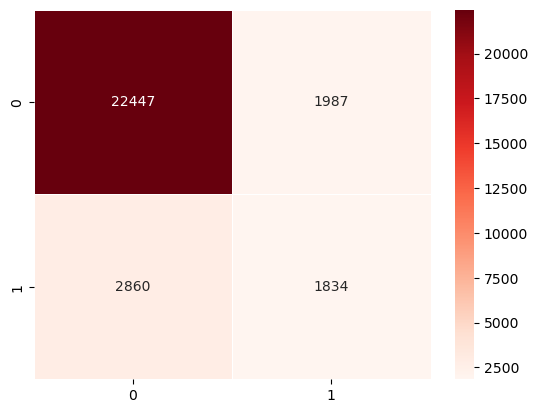

In [158]:
cm_nb = confusion_matrix(y_test2, y_pred_gnb)
sns.heatmap(cm_nb, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

# Save Plot
plt.savefig("confusion_matrix_5.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

In [159]:
#Ringkasan Evaluasi Model Naive Bayes
print('Ringkasan Evaluasi Model Naive Bayes')
print("")
print('Akurasi :' ,round(accuracy_score(y_test2, y_pred_gnb),4))
print('Presisi :' ,round(precision_score(y_test2,y_pred_gnb),4))
print('Recall :' ,round(recall_score(y_test2,y_pred_gnb),4))
print('F1 Score :' ,round(f1_score(y_test2,y_pred_gnb),4))

Ringkasan Evaluasi Model Naive Bayes

Akurasi : 0.8336
Presisi : 0.48
Recall : 0.3907
F1 Score : 0.4308


### Decision Tree Classifier

In [160]:
# Train the model using the training sets
dtc_model = dtc_model.fit(X_train2, y_train2)

In [161]:
# Predict the response for test dataset
y_pred_dtc = dtc_model.predict(X_test2)

In [162]:
#Classification Report Decition Tree Classifier
print(classification_report(y_test2, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     24434
           1       0.68      0.22      0.33      4694

    accuracy                           0.86     29128
   macro avg       0.78      0.60      0.63     29128
weighted avg       0.84      0.86      0.83     29128



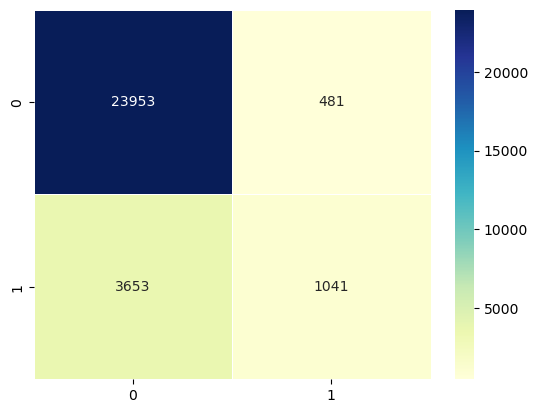

In [163]:
cm_dct = confusion_matrix(y_test2, y_pred_dtc)
sns.heatmap(cm_dct, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

# Save Plot
plt.savefig("confusion_matrix_6.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

In [164]:
#Ringkasan Evaluasi Model Decision Tree Classifier
print('Ringkasan Evaluasi Model Decision Tree Classifier')
print("")
print('Akurasi :' ,round(accuracy_score(y_test2, y_pred_dtc),4))
print('Presisi :' ,round(precision_score(y_test2,y_pred_dtc),4))
print('Recall :' ,round(recall_score(y_test2,y_pred_dtc),4))
print('F1 Score :' ,round(f1_score(y_test2,y_pred_dtc),4))

Ringkasan Evaluasi Model Decision Tree Classifier

Akurasi : 0.8581
Presisi : 0.684
Recall : 0.2218
F1 Score : 0.3349


### Random Forest Classifier

In [165]:
# Train the model using the training sets
rfc_model = rfc_model.fit(X_train2 ,y_train2) 

In [166]:
# Predict the response for test dataset
y_pred_rfc = rfc_model.predict(X_test2)

In [167]:
#Classification Report Random Forest Classifier
print(classification_report(y_test2, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93     24434
           1       0.71      0.33      0.45      4694

    accuracy                           0.87     29128
   macro avg       0.80      0.65      0.69     29128
weighted avg       0.86      0.87      0.85     29128



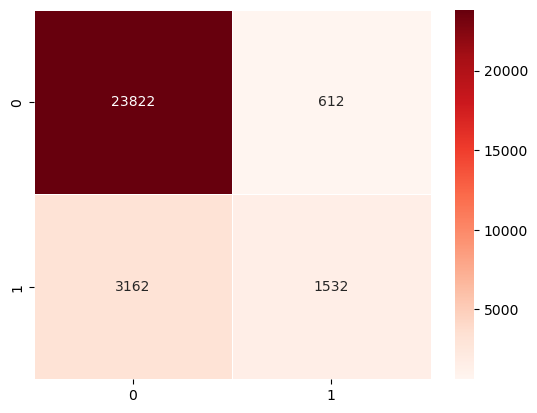

In [168]:
cm_rfc = confusion_matrix(y_test2, y_pred_rfc)
sns.heatmap(cm_rfc, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

# Save Plot
plt.savefig("confusion_matrix_7.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

In [169]:
#Ringkasan Evaluasi Model Random Forest Classifier
print('Ringkasan Evaluasi Model Random Forest Classifier')
print("")
print('Akurasi :' ,round(accuracy_score(y_test2, y_pred_rfc),4))
print('Presisi :' ,round(precision_score(y_test2, y_pred_rfc),4))
print('Recall :' ,round(recall_score(y_test2, y_pred_rfc),4))
print('F1 Score :' ,round(f1_score(y_test2, y_pred_rfc),4))

Ringkasan Evaluasi Model Random Forest Classifier

Akurasi : 0.8704
Presisi : 0.7146
Recall : 0.3264
F1 Score : 0.4481


In [170]:
df_pred2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97093 entries, 0 to 145459
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rainfall       97093 non-null  float64
 1   WindGustDir    97093 non-null  int32  
 2   WindGustSpeed  97093 non-null  float64
 3   Humidity3pm    97093 non-null  float64
 4   Pressure9am    97093 non-null  float64
 5   Cloud3pm       97093 non-null  float64
 6   Temp9am        97093 non-null  float64
 7   Temp3pm        97093 non-null  float64
 8   RainTomorrow   97093 non-null  int32  
 9   Year           97093 non-null  int64  
 10  Month          97093 non-null  int64  
 11  Day            97093 non-null  int64  
dtypes: float64(7), int32(2), int64(3)
memory usage: 8.9 MB


In [171]:
df_pred2.head()

,Rainfall,WindGustDir,WindGustSpeed,Humidity3pm,Pressure9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,Year,Month,Day
0,0.6,13,44.0,22.0,1007.7,5.0,16.9,21.8,0,2008,12,1
1,0.0,14,44.0,25.0,1010.6,5.0,17.2,24.3,0,2008,12,2
2,0.0,15,46.0,30.0,1007.6,2.0,21.0,23.2,0,2008,12,3
3,0.0,4,24.0,16.0,1017.6,5.0,18.1,26.5,0,2008,12,4
4,1.0,13,41.0,33.0,1010.8,8.0,17.8,29.7,0,2008,12,5
